In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
dataset = randn(25)


(0, 1)

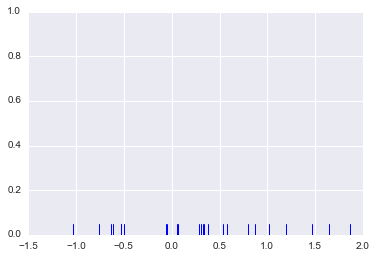

In [8]:
sns.rugplot(dataset)
plt.ylim(0,1)

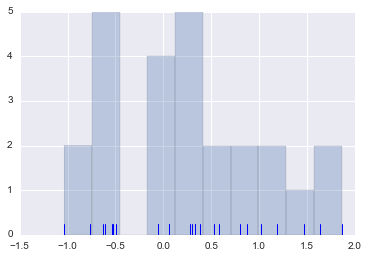

In [9]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

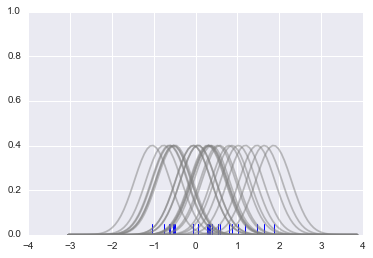

In [10]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() +2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth= ((4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset:
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey', alpha = 0.5)

plt.ylim(0,1)

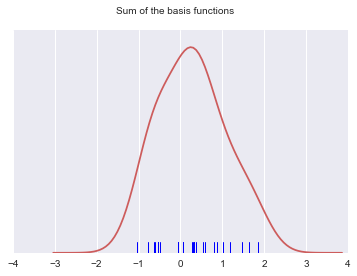

In [11]:
sum_of_kde = np.sum(kernel_list,axis = 0)
fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

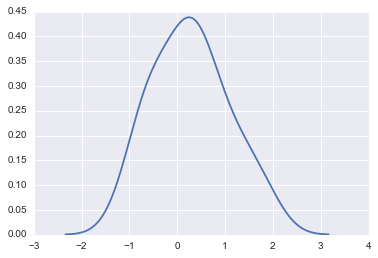

In [12]:
sns.kdeplot(dataset)

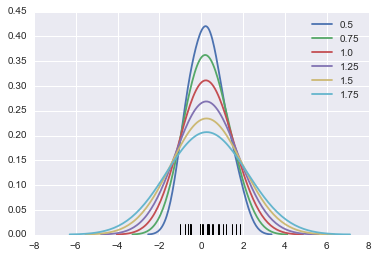

In [13]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset,bw = bw, lw=1.8, label = bw)
    


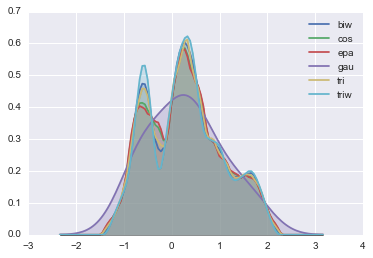

In [15]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern,label=kern, shade = True)

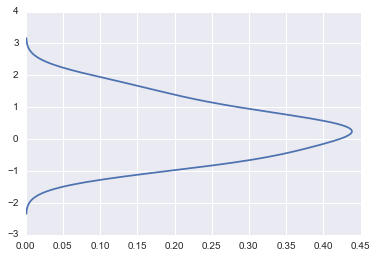

In [16]:
sns.kdeplot(dataset,vertical=True)

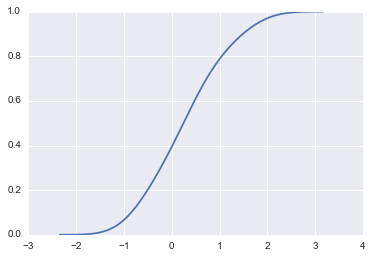

In [17]:
sns.kdeplot(dataset,cumulative = True)

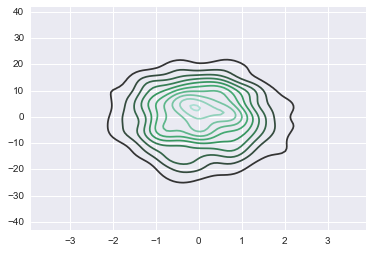

In [18]:
mean = [0,0]
cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2,columns = ['X','Y'])
sns.kdeplot(dframe)

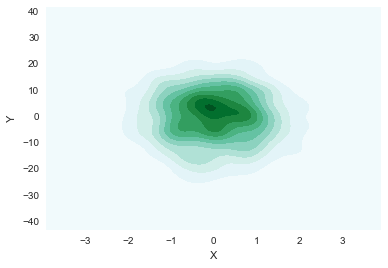

In [21]:
sns.kdeplot(dframe.X,dframe.Y, shade = True)

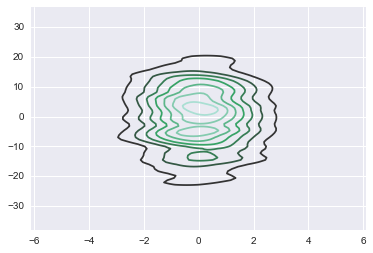

In [22]:
sns.kdeplot(dframe,bw=1)

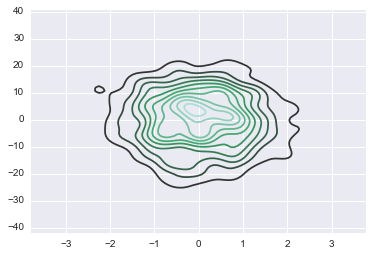

In [23]:
sns.kdeplot(dframe,bw='silverman')

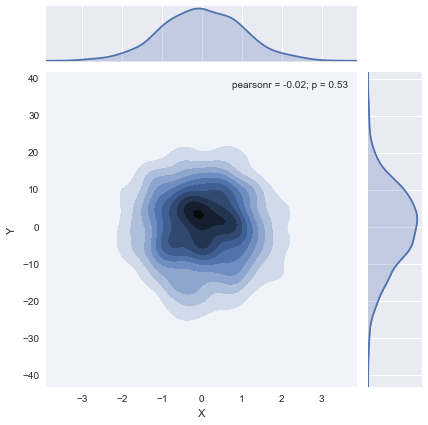

In [24]:
sns.jointplot('X','Y',dframe,kind='kde')